In [1]:
import numpy as np
from PIL import Image, ImageOps, ImageEnhance
import math
from math import floor, ceil
import random
import pandas as pd
from IPython.display import display

from scipy.ndimage import zoom
from scipy.ndimage import grey_erosion
from scipy.ndimage import gaussian_filter
from scipy.ndimage.interpolation import shift

from skimage import transform
from skimage import util

# vetor de string:

#cada elemento do vetor vc executa uma função/ parametro dela tbm
import random
from numpy import select

from numpy.random import laplace

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
#from tqdm import tqdm

import os
import pathlib
import random

# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from tensorflow.keras import layers, models, utils

from skimage import transform

from random import randint

from skimage import util

In [3]:
import Aug

In [4]:
class Operacao:
    prob = 0
    def __init__(self, prob):
        
        if prob > 1 or  prob < 0:
            raise Exception('prob must be less than or equal to 1 and greater than or equal to 0')
        else:
            self.prob = prob

    def execute(self):
            raise NotImplementedError("abs class")
    def get_class_name(self):
        return self.__class__.__name__
    def get_dict_atrs(self):
        return self.__dict__

In [5]:
class Skew (Operacao):
    def __init__(self, prob=1, skew_type='RANDOM', magnitude=0.5):
        Operacao.__init__(self, prob)
        self.skew_type = skew_type
        self.magnitude = magnitude
    def execute(self, image):
        return Aug.skew(image, skew_type=self.skew_type, magnitude=self.magnitude)

In [6]:
class Invert (Operacao):
    def __init__(self):
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.ImageOps.invert(image)

In [7]:
class Rotacao(Operacao):
    def __init__(self, prob, max_left_rotation=90, max_right_rotation=90, fill='edge'):
        Operacao.__init__(self, prob)
        self.max_left_rotation = max_left_rotation 
        self.max_right_rotation = max_right_rotation
        self.fill = fill #constant`, `edge`, `wrap`, `reflect` or `symmetric`
    def execute(self, image):    
        return Image.fromarray(np.uint8(Aug.rotation(np.array(image).astype('uint8'), max_left_rotation=self.max_left_rotation, max_right_rotation=self.max_right_rotation)*255 ))

In [8]:
class Zoom_Random(Operacao):
    def __init__(self, prob, percentage_area=1, randomise=False):
        self.percentage_area = percentage_area
        self.randomise       = randomise
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.zoom_random(image, self.percentage_area, self.randomise)

In [9]:
class Random_Noise(Operacao):
    def __init__(self, prob, mode='s&p'):
        self.mode = mode#gaussian,localvar,poisson,salt,pepper,s&p,speckle
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Image.fromarray(np.uint8(Aug.random_noise(np.array(image).astype('uint8')*255, mode1=self.mode ) ))

In [10]:
class Gaussian(Operacao):# argumentos-----------------------------------
    def __init__(self, prob, sig=2.0, fill='nearest'):
        self.sig=sig
        self.fill = fill
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.gaussian(image, sig=self.sig, fill=self.fill)

In [11]:
class Random_Erasing(Operacao):
    def __init__(self, prob, rectangle_area=0.4, repetitions=1):
        Operacao.__init__(self, prob)
        self.rectangle_area = rectangle_area
        self.repetitions = repetitions
    def execute(self, image):
        return Aug.random_erasing(image, rectangle_area = self.rectangle_area, repetitions=self.repetitions)

In [12]:
class Shift(Operacao):
    def __init__(self, prob, horizontal_max=0.2, vertical_max=0.2, randomise=False, fill='nearest'):
        Operacao.__init__(self, prob)
        self.horizontal_max = horizontal_max
        self.vertical_max = vertical_max
        self.randomise = randomise
        self.fill = fill
    def execute(self, image):
        return Aug.shifts(image, horizontal_max=self.horizontal_max, vertical_max=self.vertical_max, randomise = self.randomise, fill=self.fill)

In [13]:
class Zoom(Operacao):
    def __init__(self, prob, min_factor=1, max_factor=2):
        self.min_factor = min_factor
        self.max_factor = max_factor
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.zoom(image, min_factor=self.min_factor, max_factor=self.max_factor)

In [14]:
class Distort(Operacao):
    def __init__(self, prob, grid_width=4, grid_height=4, magnitude=5):
        self.grid_width  = grid_width
        self.grid_height = grid_height
        self.magnitude   = magnitude
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.distort(image, grid_width=self.grid_width, grid_height=self.grid_height, magnitude=self.magnitude)

In [15]:
class Shear(Operacao):
    def __init__(self, prob, grid_width=4, grid_height=4):
        self.max_shear_left  = max_shear_left
        self.max_shear_right = max_shear_right
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.shear(image,  max_shear_left=self.max_shear_left,  max_shear_right=self.max_shear_right)

In [16]:
class Flip(Operacao):
    def __init__(self, prob, top_bottom_left_right='RANDOM'):
        self.top_bottom_left_right  = top_bottom_left_right
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.flip(image,  top_bottom_left_right=self.top_bottom_left_right)

In [17]:
class Skew(Operacao):
    def __init__(self, prob, skew_type='RANDOM', magnitude=1):
        self.skew_type = skew_type
        self.magnitude = magnitude
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.Skew(image,  skew_type=self.skew_type,  magnitude=self.magnitude)

In [18]:
class Grey_Erosion(Operacao):#******adicionar argumentos
    def __init__(self, prob):
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Image.fromarray(np.uint8(Aug.grey_erosion(np.array(image).astype('uint8'),size=(3,3))*255 ))

In [19]:
'''class Edge(Operacao):#******adicionar argumentos
    def __init__(self, prob, minVal=100, maxVal=100):
        Operacao.__init__(self, prob)
        self.minVal=minVal
        self.maxVal=maxVal
    def execute(self, image):
        return Image.fromarray(np.uint8(Aug.edge(np.array(image).astype('uint8'), minVal=self.minVal, maxVal=self.maxVal)*255 ))'''
class Edge(Operacao):
    def __init__(self, prob):
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Image.fromarray(np.uint8(Aug.edge(np.array(image).astype('uint8'))*255 ))

In [20]:
class Contrast(Operacao):
    def __init__(self, prob, min_factor=1, max_factor=1):
        self.min_factor = min_factor
        self.max_factor = max_factor
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.contrast(image, min_factor=self.min_factor, max_factor=self.max_factor)

In [21]:
class Color(Operacao):
    def __init__(self, prob, min_factor=1, max_factor=1):
        self.min_factor = min_factor
        self.max_factor = max_factor
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.color(image, min_factor=self.min_factor, max_factor=self.max_factor)

In [22]:
class Brilho(Operacao):
    def __init__(self, prob, min_factor=1, max_factor=1):
        self.min_factor = min_factor
        self.max_factor = max_factor
        Operacao.__init__(self, prob)
    def execute(self, image):
        return Aug.brilho(image, min_factor=self.min_factor, max_factor=self.max_factor)

In [23]:
class Pipe:
    def __init__(self):
        self.lista_de_operacoes = []
    def add(self, objeto):
        self.lista_de_operacoes.append(objeto)
    def remove(self, posicao = -1):
        self.lista_de_operacoes.pop(posicao)
    def replace(self, index, objeto):
        self.lista_de_operacoes[index] = objeto
    def operar(self, image, vezes = 1):
        image = Image.fromarray(image)
        
        aux_2 = []
        alterou = False
        for i in range(vezes):
            aux = image
            alterou = False #ta uma bosta-----------------------
            for operacao in self.lista_de_operacoes:
                
                if operacao.prob >= random.uniform(0,1):
                    aux = operacao.execute(aux)
                    alterou = True
                else:
                    continue
            if alterou:
                aux_2.append(aux)
                #alterou = False #isso aqui é o fino-----------------------------
            else:
                continue
        return aux_2

    def print(self):
        print(f"Operações:")
        for operacao in self.lista_de_operacoes:
            atributos = operacao.get_dict_atrs()
            op = {"Operação": operacao.get_class_name()}
            op.update(atributos)
            tabela = pd.DataFrame(data= op, index = [""])
            display(tabela)
        print()

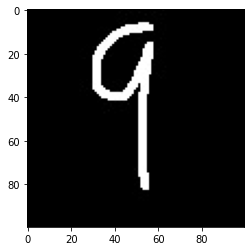

In [24]:
img_array = cv2.imread('ura1.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array, cmap='gray')
plt.show()

In [25]:
#deixar pelo menos uma 
pipe_1 = Pipe()

#pipe_1.add(Rotacao(0.2, max_left_rotation=40, max_right_rotation=40))
#pipe_1.add(Shift(0.3, 0.3, 0.3, True))
#pipe_1.add(Random_Noise(0.7))
pipe_1.add( Random_Erasing(prob=1, rectangle_area=0.3, repetitions=2) )
#pipe_1.add( Edge(prob=1.0) )


pipe_1.print()

#pipe_1.remove(2)

pipe_1.print()

Operações:


,Operação,prob,rectangle_area,repetitions
,Random_Erasing,1,0.3,2



Operações:


,Operação,prob,rectangle_area,repetitions
,Random_Erasing,1,0.3,2


Operações:


,Operação,prob,rectangle_area,repetitions
,Random_Erasing,1,0.3,2


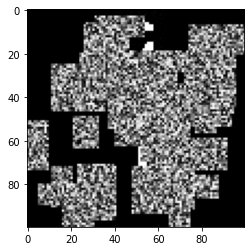

In [26]:
#pipe_1.replace(2, Flip(prob=0.2))

pipe_1.print()

image = img_array

lista_de_imagens = []

lista_de_imagens = pipe_1.operar(image, 16)

plt.imshow(lista_de_imagens[4], cmap='gray')
plt.show()

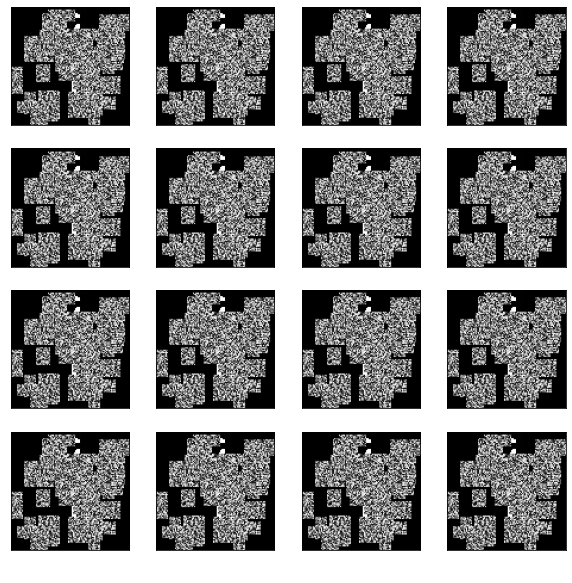

In [27]:
plt.figure(figsize=(10,10))
m = 90
if( len(lista_de_imagens) < 90 ):
    m = len(lista_de_imagens)
for i in range(m):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(lista_de_imagens[i], cmap='gray')
    plt.xlabel("{}\n({})".format( 4, 4 ), color='white')    
plt.show()